In [2]:
import os 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

2023-05-29 12:39:53.533094: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [203]:
inputs = np.load('inputs_batch1.npy')
outputs = np.load('outputs_batch1.npy')
inputs_best = np.load('inputs_best_batch1.npy')
outputs_best = np.load('outputs_best_batch1.npy')

inputs_f = []
outputs_f = []

pos_to_filter_out = ["K","DST"]

for input_val, output_val in zip(inputs, outputs):
    if output_val not in pos_to_filter_out:
        inputs_f.append(input_val)
        outputs_f.append(output_val)

inputs_f = np.array(inputs_f)
outputs_f = np.array(outputs_f)


print(f'Inputs (All Picks) Length: {len(inputs)}')
print(f'Outputs (All Picks) Length: {len(outputs)}')
print(f'Input (Smart Picks) Length: {len(inputs_best)}')
print(f'Outputs (Smart Picks) Length: {len(outputs_best)}')

print(f'Inputs (All Picks excluding K & DST) Length: {len(inputs_f)}')
print(f'Outputs (All Picks excluding K & DST) Length: {len(outputs_f)}')

Inputs (All Picks) Length: 10561
Outputs (All Picks) Length: 10561
Input (Smart Picks) Length: 3526
Outputs (Smart Picks) Length: 3526
Inputs (All Picks excluding K & DST) Length: 9144
Outputs (All Picks excluding K & DST) Length: 9144


### LSTM Model

In [218]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)
y_test_encoded = encoder.transform(y_test)
y_train_encoded = to_categorical(y_train_encoded)
y_val_encoded = to_categorical(y_val_encoded)
y_test_encoded = to_categorical(y_test_encoded)

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=50, validation_data=(X_val, y_val_encoded))

loss, accuracy = model.evaluate(X_test, y_test_encoded)

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


Epoch 1/50


2023-05-29 16:48:39.111729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-29 16:48:39.113641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-29 16:48:39.115636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

182/185 [============================>.] - ETA: 0s - loss: 1.4075 - accuracy: 0.4263

2023-05-29 16:48:43.922256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-29 16:48:43.925795: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-29 16:48:43.928340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

185/185 [==============================] - 6s 10ms/step - loss: 1.4058 - accuracy: 0.4274 - val_loss: 1.2904 - val_accuracy: 0.4483
Epoch 2/50
185/185 [==============================] - 1s 3ms/step - loss: 1.2411 - accuracy: 0.4702 - val_loss: 1.2319 - val_accuracy: 0.4442
Epoch 3/50
185/185 [==============================] - 1s 3ms/step - loss: 1.2342 - accuracy: 0.4641 - val_loss: 1.2450 - val_accuracy: 0.4449
Epoch 4/50
185/185 [==============================] - 1s 3ms/step - loss: 1.2097 - accuracy: 0.4781 - val_loss: 1.2020 - val_accuracy: 0.4496
Epoch 5/50
185/185 [==============================] - 1s 3ms/step - loss: 1.1844 - accuracy: 0.4840 - val_loss: 1.1858 - val_accuracy: 0.4665
Epoch 6/50
185/185 [==============================] - 1s 3ms/step - loss: 1.1902 - accuracy: 0.4708 - val_loss: 1.2254 - val_accuracy: 0.4517
Epoch 7/50
185/185 [==============================] - 1s 4ms/step - loss: 1.1856 - accuracy: 0.4747 - val_loss: 1.1768 - val_accuracy: 0.4591
Epoch 8/50
185/1

In [219]:
# get the model predictions
y_pred = model.predict(X_test)

# get the top two predictions
top_two_pred = np.argsort(y_pred, axis=-1)[:, -2:]

# convert your one-hot encoded labels back to class indices
y_test_class_indices = np.argmax(y_test_encoded, axis=-1)

# calculate accuracy
correct = [y in pred for y, pred in zip(y_test_class_indices, top_two_pred)]
accuracy = np.mean(correct)

print(f'Top-2 accuracy: {accuracy * 100:.2f}%')

2023-05-29 16:49:36.883473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-29 16:49:36.887264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-29 16:49:36.889588: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

100/100 [==============================] - 1s 2ms/step
Top-2 accuracy: 83.34%


100/100 [==============================] - 0s 2ms/step


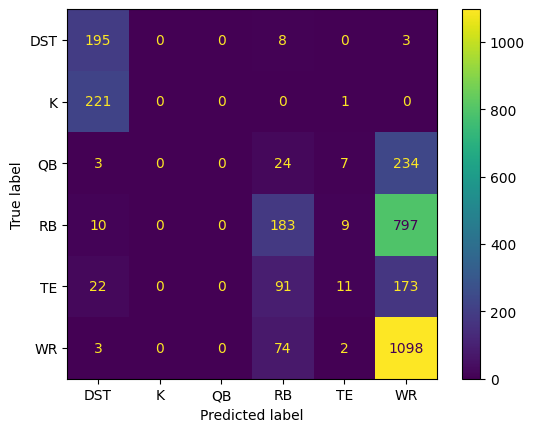

In [220]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate class predictions for the test set
y_pred_raw = model.predict(X_test)
y_pred = np.argmax(y_pred_raw, axis=-1)

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded.argmax(axis=1), y_pred)

# If you want a visual representation of the confusion matrix:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()


### Random Forest Model

CV Accuracy: 0.653 (0.013)
Test Accuracy: 0.6516251183338593
Top-2 accuracy: 87.85%


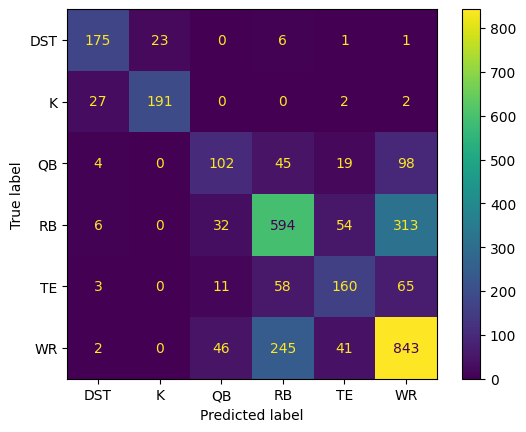

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split your data into training and testing sets
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.3, random_state=42)

encoder = LabelEncoder()
outputs_train_encoded = encoder.fit_transform(outputs_train)
outputs_test_encoded = encoder.transform(outputs_test)

# Prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform the cross-validation procedure
scores = cross_val_score(model, inputs_train, outputs_train_encoded, scoring='accuracy', cv=cv, n_jobs=-1)

# Report performance
print('CV Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# Fit the model to the training dataset
model.fit(inputs_train, outputs_train_encoded)

# Evaluate the model on the test dataset
test_accuracy = model.score(inputs_test, outputs_test_encoded)

print(f'Test Accuracy: {test_accuracy}')

# Get the probabilities
probabilities = model.predict_proba(inputs_test)

# Get the top two class indices for each data point
top_two_pred = np.argsort(probabilities, axis=1)[:, -2:]

# Calculate accuracy for top 2 predictions
correct = [y in pred for y, pred in zip(outputs_test_encoded, top_two_pred)]
accuracy = np.mean(correct)

print(f'Top-2 accuracy: {accuracy * 100:.2f}%')

# Fit the model to the training dataset
model.fit(inputs_train, outputs_train_encoded)

# Evaluate the model on the test dataset
test_predictions = model.predict(inputs_test)

# Generate the confusion matrix
cm = confusion_matrix(outputs_test_encoded, test_predictions)

# Print the confusion matrix
# print("Confusion Matrix:")
# print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='viridis')

# Show the plot
plt.show()